# Učinkovitost oklapanja

Učinkovitost oklapanja za pravokutni otvor, odnosno za slot antenu, ovisi o frekvenciji i duljini otvora. Maksimalna učinkovitost antene (najlošije oklapanje) ostvaruje se kada je $l=~\lambda/2$. Ukoliko se na toj frekvenciji definira učinkovitost oklapanja $S=0~\mathrm{dB}$, tada za linearnu dimenziju otvora $l \leq \lambda/2$ može se pisati

$S=20\log(\frac{\lambda}{2l})~\mathrm{[dB]}$.

Ukoliko postoji više otvora jednakih dimenzija linearno raspoređenih na površini manjoj od $\lambda/2$ tada se učinkovitost oklapanja smanjuje u ovisnosti o njihovom broju $n$,

$S=20\log(\frac{\lambda}{2l})-20\log(\sqrt n)~\mathrm{[dB]}$.

In [1]:
def SE(l1,l2,f1,f2,n1):            
    l = np.linspace(l1, l2, num=20)
    #f = np.linspace(f1, f2, num=20) 
    f = np.logspace(np.log10(f1), np.log10(f2), num=20) 
    l, f = np.meshgrid(l, f)
    
    l = l/1000
    lmbda = 3e8/f
    S = 20*np.log10(lmbda/(2*l))-20*np.log10(np.sqrt(n1))    
    for i in range(len(S)):
        for j in range(len(S)):
            if (S[i][j] < 0):
                S[i][j] = 0
    return S,l*1000,f/1e9

<IPython.core.display.Javascript object>


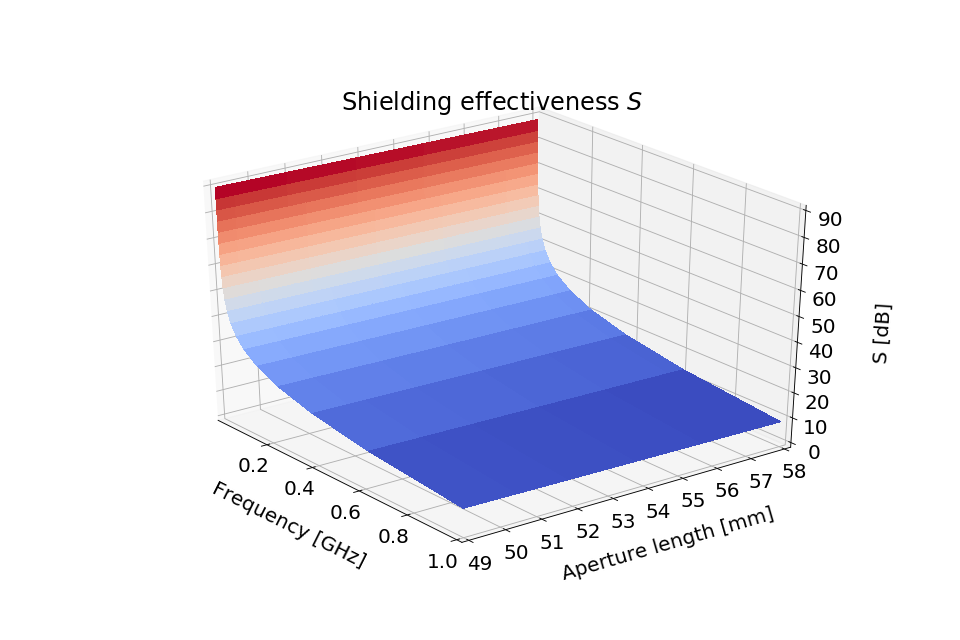

In [2]:
%matplotlib notebook
from ipywidgets import widgets
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D

output = widgets.Output()

style = {'description_width': '150px'}
fmin = widgets.FloatLogSlider(min=3, max=5, step=1, value=1e5,description='$f_{min}$ [Hz]:',style=style,layout=widgets.Layout(width='75%'), continuous_update=False)
fmax = widgets.FloatLogSlider(min=6, max=9, step=1, value=1e9,description='$f_{max}$ [Hz]:',style=style,layout=widgets.Layout(width='75%'), continuous_update=False)
lmin = widgets.IntSlider(value=10,min=1,max=100,step=1,description='$l_{min}$ [mm]:',readout_format='.1f',style=style,layout=widgets.Layout(width='75%'), continuous_update=False)
lmax = widgets.IntSlider(value=300,min=1,max=300,step=1,description='$l_{max}$ [mm]:',readout_format='.1f',style=style,layout=widgets.Layout(width='75%'), continuous_update=False)
n = widgets.IntSlider(value=5,min=1,max=30.0,step=1,description='apertures no. $n$:',readout_format='.1f',style=style,layout=widgets.Layout(width='75%'), continuous_update=False)
     
fig = plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')     
plt.rcParams.update({'font.size': 18})  
axes = fig.gca(projection='3d')
axes = fig.gca()
axes.set_xscale("linear")
axes.set_yscale("linear")

def fu(fmin, fmax, lmin, lmax, n):         
    plt.cla() 
    
    plt.title('Shielding effectiveness $S$')
    S,l,f = SE(lmin,lmax,fmin,fmax,n)    
    sf = axes.plot_surface(f, l, S, cmap=cm.coolwarm, linewidth=0, antialiased=False)              
    
    axes.set_xlim(fmin/1e9, fmax/1e9)  
    axes.set_ylim(lmin, lmax)  
    axes.set_zlim(0, 90)    

    plt.grid(True,which="both",ls=":")
    axes.set_xlabel('Frequency [GHz]')
    axes.set_ylabel('Aperture length [mm]')    
    axes.set_zlabel('S [dB]')   

    axes.xaxis.labelpad=20
    axes.yaxis.labelpad=20
    axes.zaxis.labelpad=20    
        
        
out = widgets.interactive_output(fu,{'fmin': fmin, 'fmax': fmax, 'lmin': lmin, 'lmax': lmax, 'n': n})        

tab = widgets.VBox(children=[fmin, fmax, lmin, lmax, n])

widgets.VBox([tab, output])

Za zadanu dužinu otvora $l$ i njihov broj $n$ može se odrediti efikasnost oklapanja $S$ korištenjem sljedećeg primjera.

In [15]:
def SE(l1,f1,f2,n1):            

    f = np.logspace(np.log10(f1), np.log10(f2), num=20) 
    
    l1 = l1/1000
    lmbda = 3e8/f
    S = 20*np.log10(lmbda/(2*l1))-20*np.log10(np.sqrt(n1))    
    for i in range(len(S)):    
        if (S[i] < 0):
            S[i] = 0
    return S,f/1e9

<IPython.core.display.Javascript object>


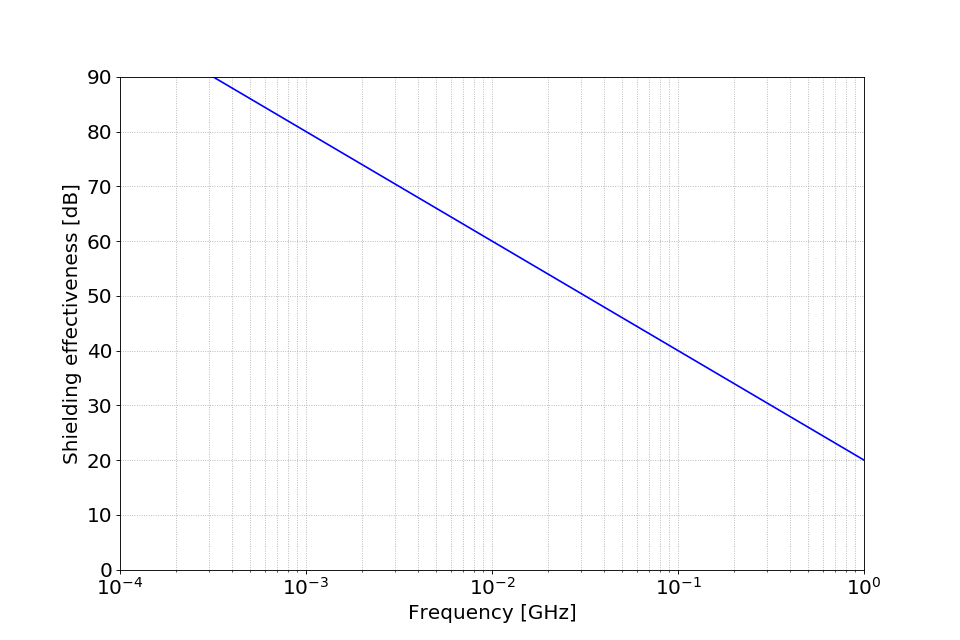

In [22]:
%matplotlib notebook
from ipywidgets import widgets
import numpy as np
import matplotlib.pyplot as plt

output = widgets.Output()

style = {'description_width': '150px'}
fmin = widgets.FloatLogSlider(min=3, max=5, step=1, value=1e5,description='$f_{min}$ [Hz]:',style=style,layout=widgets.Layout(width='75%'), continuous_update=False)
fmax = widgets.FloatLogSlider(min=6, max=9, step=1, value=1e9,description='$f_{max}$ [Hz]:',style=style,layout=widgets.Layout(width='75%'), continuous_update=False)
l = widgets.IntSlider(value=10,min=1,max=300,step=1,description='$l$ [mm]:',readout_format='.1f',style=style,layout=widgets.Layout(width='75%'), continuous_update=False)
n = widgets.IntSlider(value=5,min=1,max=30.0,step=1,description='apertures no. $n$:',readout_format='.1f',style=style,layout=widgets.Layout(width='75%'), continuous_update=False)
     
fig1 = plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')     
plt.rcParams.update({'font.size': 18})  
axes = fig1.gca()


def fo(fmin, fmax, l, n):         
    plt.cla() 
    
    S,f = SE(l,fmin,fmax,n)    
    sf = axes.plot(f, S, linestyle='-', color='b')              
    axes.set_xscale("log")
    axes.set_yscale("linear")
    
    axes.set_xlim(fmin/1e9, fmax/1e9)   
    axes.set_ylim(0, 90)    

    plt.grid(True,which="both",ls=":")
    axes.set_xlabel('Frequency [GHz]')
    axes.set_ylabel('Shielding effectiveness [dB]')                
        
out = widgets.interactive_output(fo,{'fmin': fmin, 'fmax': fmax, 'l': l, 'n': n})        

tab = widgets.VBox(children=[fmin, fmax, l, n])

widgets.VBox([tab, output])

In [11]:
S,f = SE(l.value,fmin.value,fmax.value,n.value)   

In [13]:
l.value

10

In [14]:
n.value

5

In [18]:
axes.set_xlim(fmin.value/1e9, fmax.value/1e9)   

(0.0001, 1.0)

In [19]:
axes.set_xscale("log")